In [5]:
import numpy as np # linear algebra
import pandas as pd

In [6]:
df= pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# New Section

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.drop(['PassengerId','Name','Cabin','Ticket'], axis =1, inplace=True)

<ipython-input-10-5d015b750f40>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu")


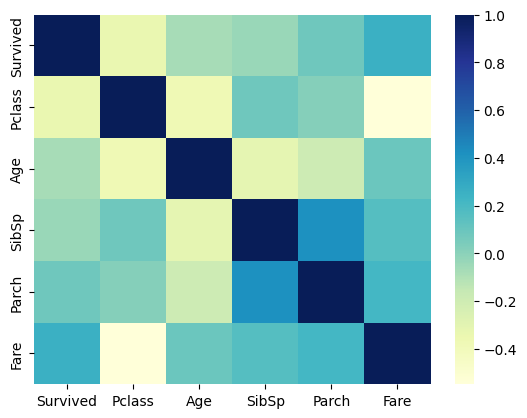

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),cmap="YlGnBu")
plt.show()

In [11]:
#survival rate by sex aqnd pclass
df.pivot_table('Survived',index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<Axes: xlabel='Sex'>

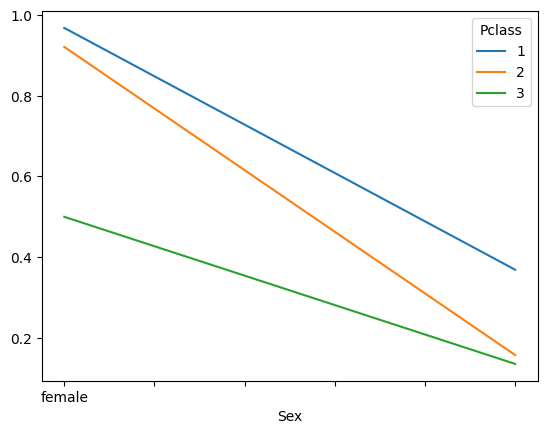

In [12]:
df.pivot_table('Survived',index='Sex', columns='Pclass').plot()

<Axes: xlabel='Pclass', ylabel='Survived'>

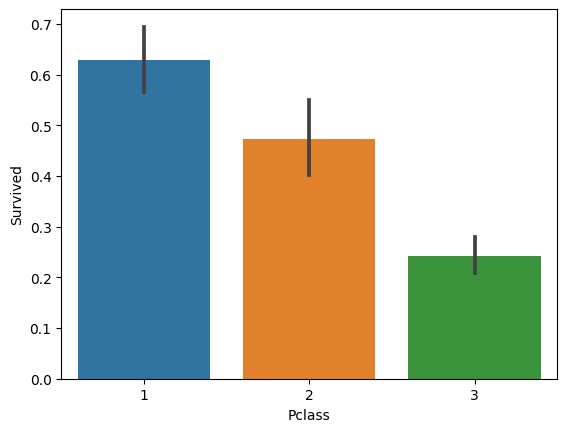

In [13]:
sns.barplot(x='Pclass', y='Survived', data =df)

In [14]:
#survival rate by sex aqnd pclass and Age
ge=pd.cut(df['Age'], [0,18,80])
df.pivot_table('Survived',['Sex','Age'], 'Pclass')


Pclass          1    2     3
Sex    Age                  
female 0.75   NaN  NaN  1.00
       1.00   NaN  NaN  1.00
       2.00   0.0  1.0  0.25
       3.00   NaN  1.0  0.00
       4.00   NaN  1.0  1.00
...           ...  ...   ...
male   70.00  0.0  0.0   NaN
       70.50  NaN  NaN  0.00
       71.00  0.0  NaN   NaN
       74.00  NaN  NaN  0.00
       80.00  1.0  NaN   NaN

[145 rows x 3 columns]

In [15]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [16]:
df= df.dropna(subset = ['Embarked', 'Age'])

In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:, 2]= labelencoder.fit_transform(df.iloc[:, 2].values)

df.iloc[:, 7]= labelencoder.fit_transform(df.iloc[:, 7].values)


<ipython-input-18-ae955b177a38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, 2]= labelencoder.fit_transform(df.iloc[:, 2].values)
<ipython-input-18-ae955b177a38>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 2]= labelencoder.fit_transform(df.iloc[:, 2].values)
<ipython-input-18-ae955b177a38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [19]:
df['Sex'].unique()

array([1, 0])

In [20]:
#splitting the data

X=df.iloc[:, 1:8].values
Y=df.iloc[:, 0].values

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size= 0.2, random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [23]:
def models(X_train,Y_train):

  #logistic regression
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
  knn.fit(X_train,Y_train)

  #decision tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train,Y_train)

  #random forest classifier
  from sklearn.ensemble import RandomForestClassifier
  forest= RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train,Y_train)

  #show training accuracy
  print('[0] logistic regression accuracy:', log.score(X_train, Y_train))
  print('[1] K Neighbors accuracy:', knn.score(X_train, Y_train))
  print('[2] Decision Tree accuracy:', tree.score(X_train, Y_train))
  print('[3] Random forest accuracy:', forest.score(X_train, Y_train))

  return log, knn, tree, forest


In [24]:
model=models(X_train,Y_train)

[0] logistic regression accuracy: 0.7978910369068541
[1] K Neighbors accuracy: 0.8664323374340949
[2] Decision Tree accuracy: 0.9929701230228472
[3] Random forest accuracy: 0.9753954305799648


In [25]:
#confusion matrix and accuracy for the 3 models on the test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm= confusion_matrix(Y_test, model[i].predict(X_test))

  #extract TN, FP, TP, FN
  TN, FP, TP, FN= confusion_matrix(Y_test, model[i].predict(X_test)).ravel()

  testScore= (TP+TN)/(TP+TN+FP+FN)

  print(cm)
  print('Model[{}] Testing accuracy "{}'.format(i, testScore ))

  print()

[[75  7]
 [19 42]]
Model[0] Testing accuracy "0.6573426573426573

[[67 15]
 [20 41]]
Model[1] Testing accuracy "0.6083916083916084

[[54 28]
 [12 49]]
Model[2] Testing accuracy "0.46153846153846156

[[73  9]
 [14 47]]
Model[3] Testing accuracy "0.6083916083916084



In [36]:

my_survival=[[3, 1, 21, 0, 0, 0, 1 ]]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
my_survival_scaled= sc.fit_transform(my_survival)

pred= model[0].predict(my_survival_scaled)
print(pred)


[0]
